In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from threshold_tuner import ClassificationThresholdTuner

In [2]:
from sklearn.datasets import load_breast_cancer

np.random.seed(0)

data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:

target_classes = pd.Series(y_true).unique()
target_classes

array([0, 1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [5]:
tuner = ClassificationThresholdTuner()

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,0,1,Macro
0,Precision,0.983607,0.944882,0.964244
0,Recall,0.895522,0.991736,0.943629
0,F1,0.937500,0.967742,0.952621


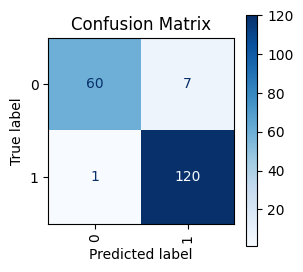

,Metric,Score
0,Brier Score,0.048751
1,AUROC,0.992846


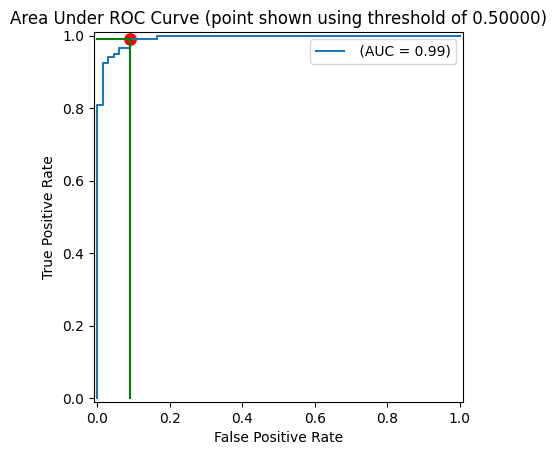

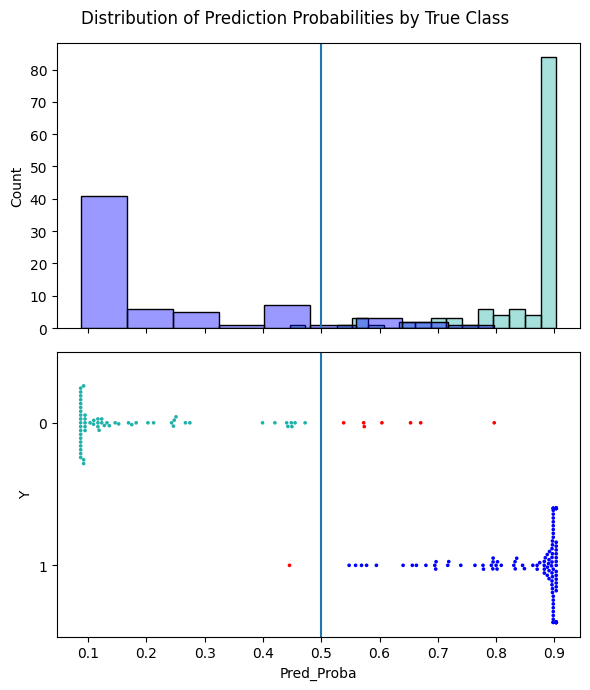

In [6]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

100%|██████████| 9/9 [00:06<00:00,  1.32it/s]


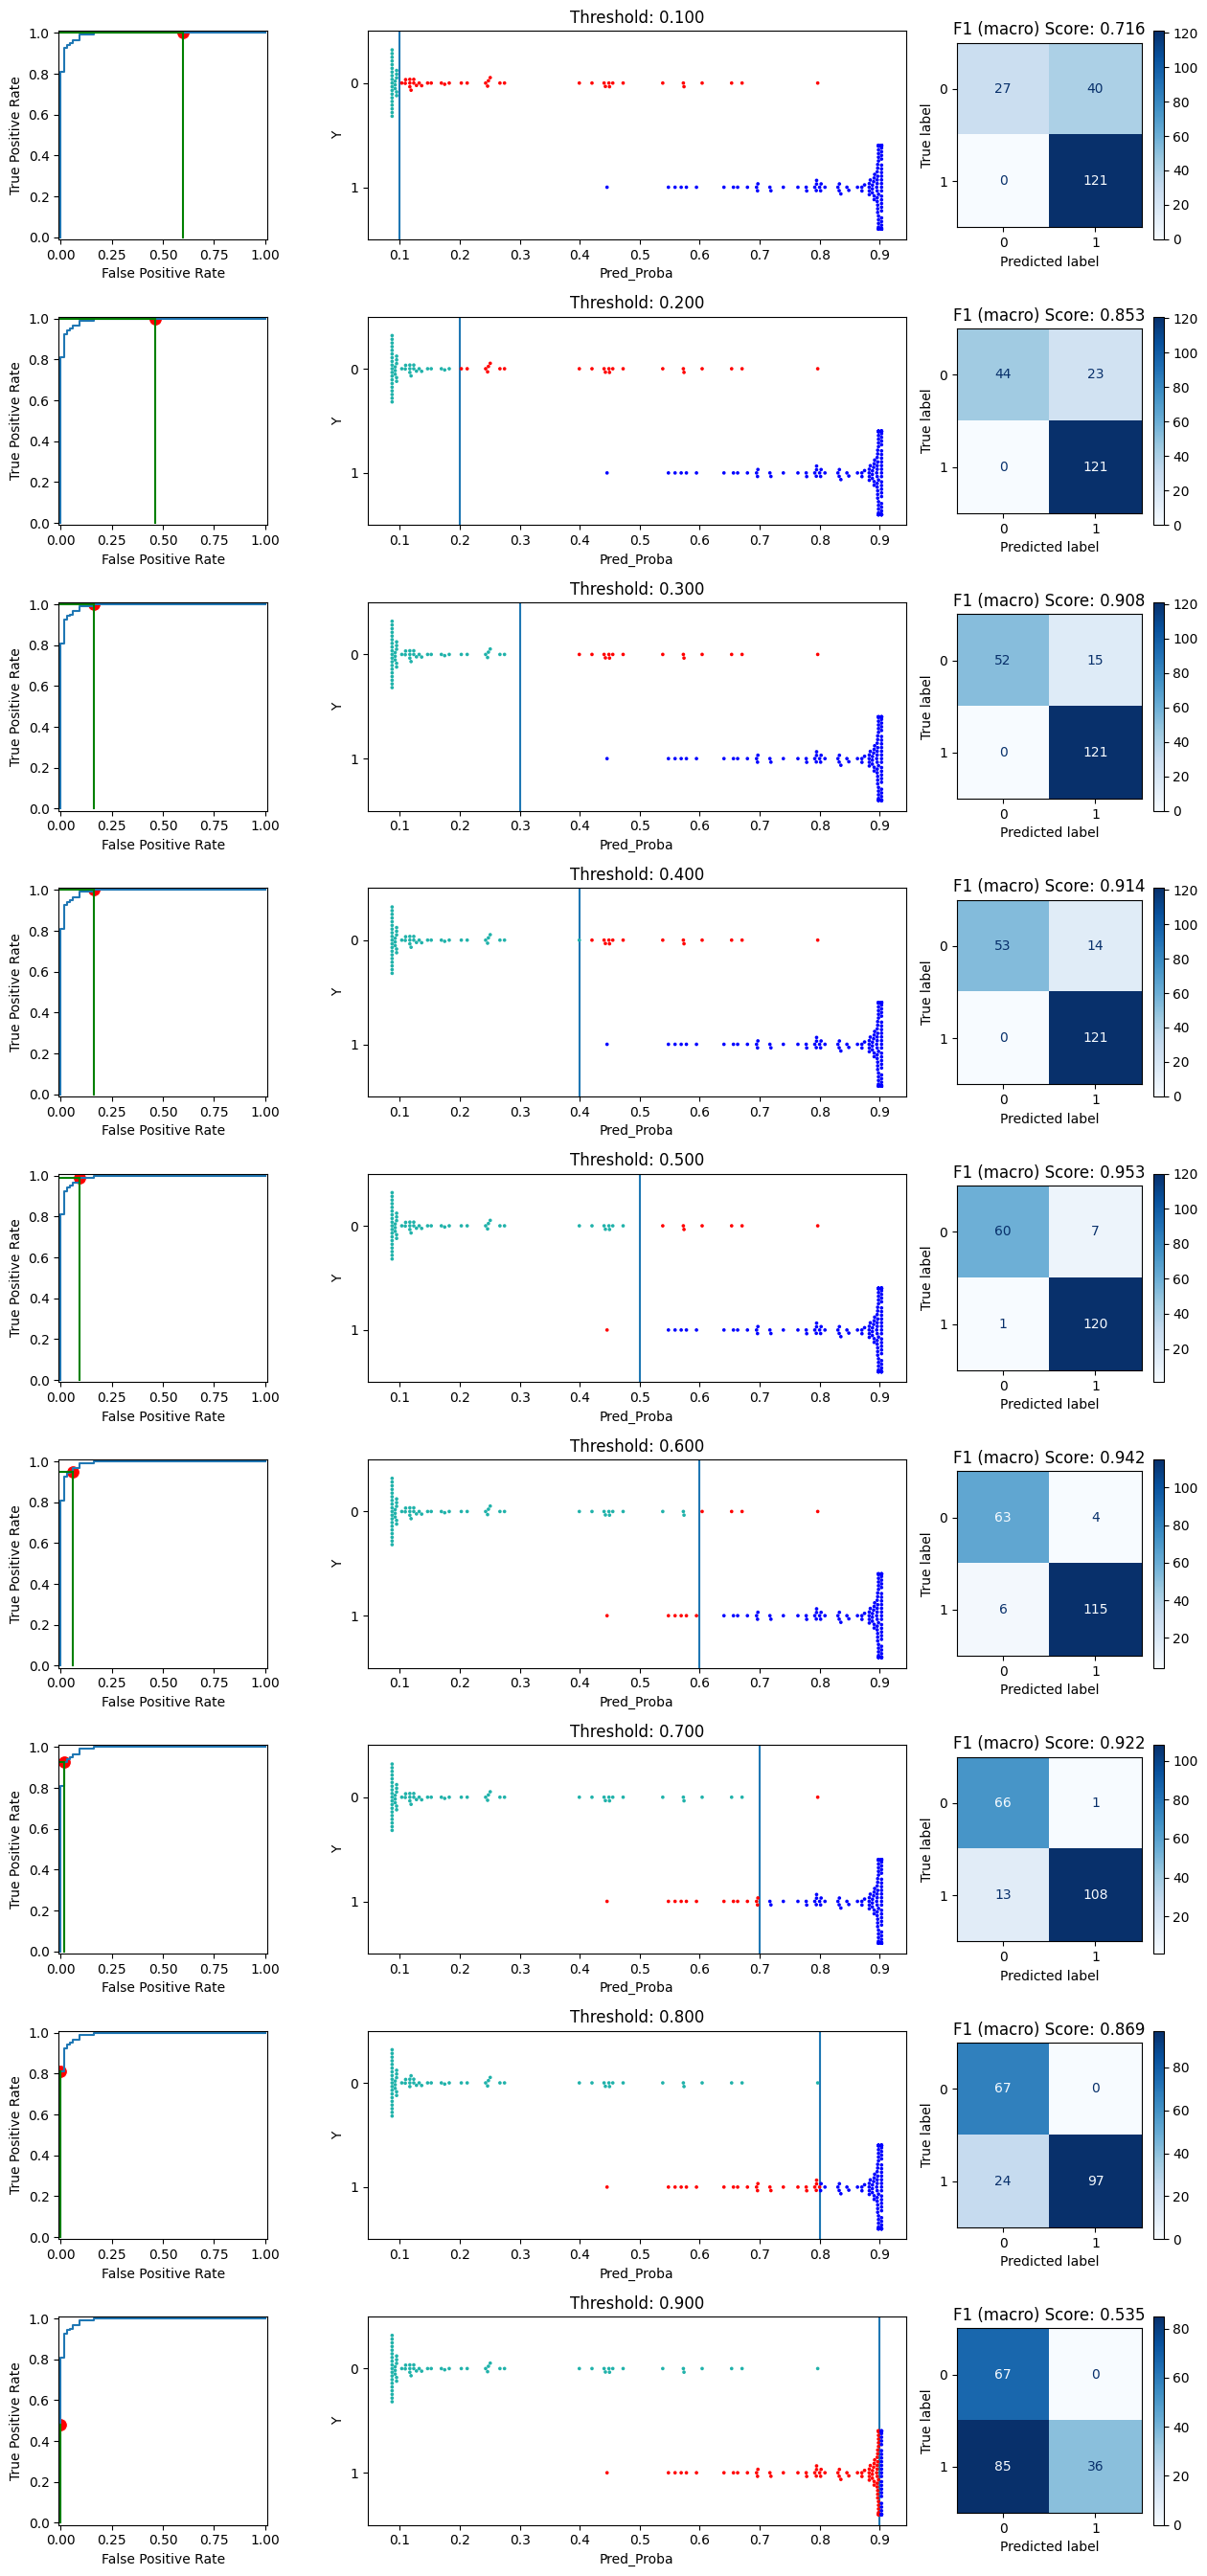

In [7]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:728: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,
d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:745: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,


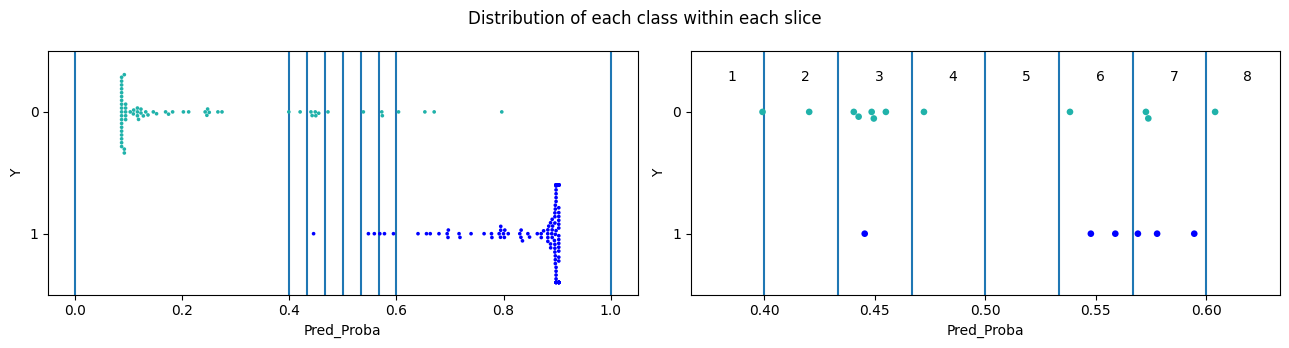

,Slice,Min Prob,Max Prob,1,0,Total,Fraction 1,Fraction 0
0,1,0.000000,0.400000,0,53,53,0.000000,1.000000
1,2,0.400000,0.433333,0,1,1,0.000000,1.000000
2,3,0.433333,0.466667,1,5,6,0.166667,0.833333
3,4,0.466667,0.500000,0,1,1,0.000000,1.000000
4,5,0.500000,0.533333,0,0,0,NaN,NaN
5,6,0.533333,0.566667,2,1,3,0.666667,0.333333
6,7,0.566667,0.600000,3,2,5,0.600000,0.400000
7,8,0.600000,1.000000,115,4,119,0.966387,0.033613


In [8]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.4, end=0.6, num_slices=6)

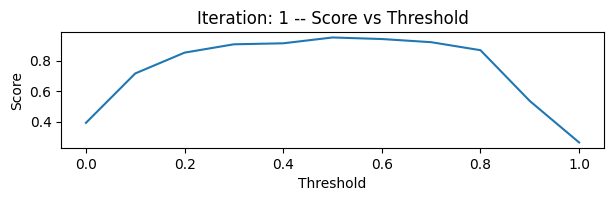

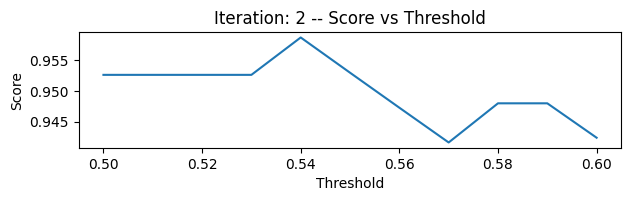

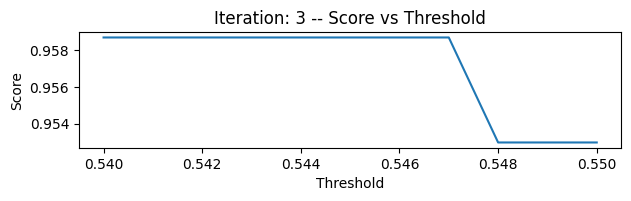

0.5465

In [9]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)
best_threshold

In [10]:
tuned_pred = tuner.get_predictions(target_classes, y_pred_proba, None, best_threshold)

# Display the first 10 predictions
tuned_pred[:10]

['1', '0', '0', '1', '1', '0', '0', '0', '1', '1']

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,0,1,Macro
0,Precision,0.983871,0.952381,0.968126
0,Recall,0.910448,0.991736,0.951092
0,F1,0.945736,0.971660,0.958698


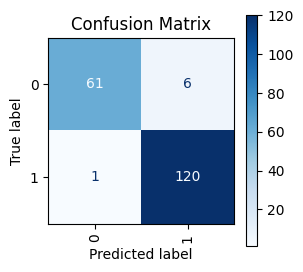

,Metric,Score
0,Brier Score,0.048751
1,AUROC,0.992846


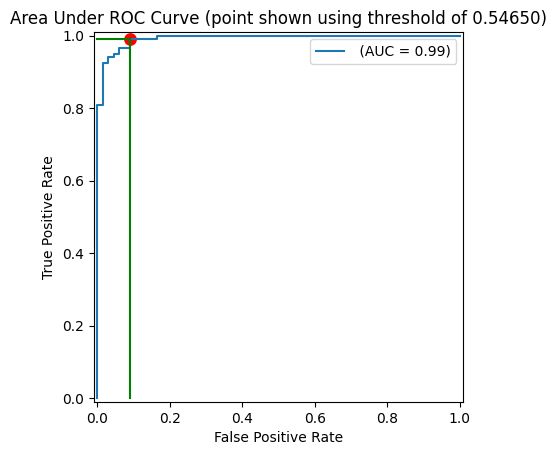

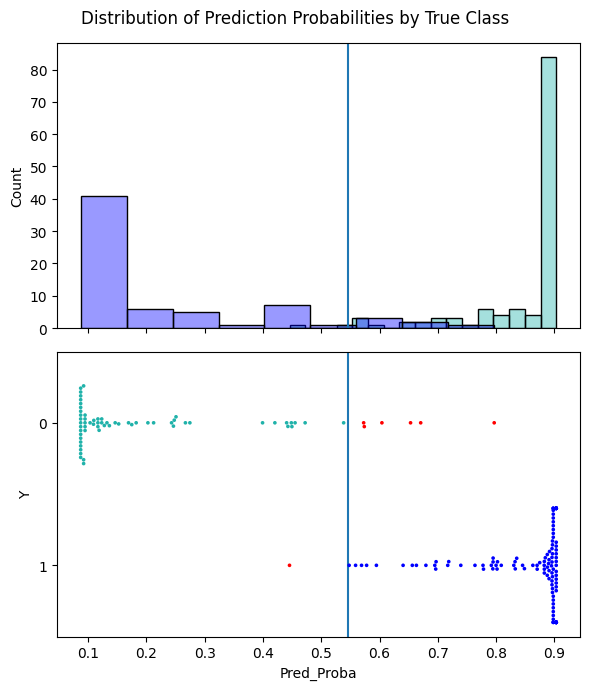

In [11]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)  

In [12]:
from sklearn.datasets import fetch_openml
np.random.seed(0)

data = fetch_openml("steel-plates-fault", version=1, parser='auto') 
df = pd.DataFrame(data['data'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0
1937,144,175,340581,340598,287,44,24,34599,112,133,...,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0
1938,145,174,386779,386794,292,40,22,37572,120,140,...,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0
1939,137,170,422497,422528,419,97,47,52715,117,140,...,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0


In [13]:
target_classes = ['1', '2']

In [14]:
y_true = data['target']
y_true.value_counts()

Class
1    1268
2     673
Name: count, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

tuner = ClassificationThresholdTuner()

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,1,2,Macro
0,Precision,0.814286,0.973510,0.893898
0,Recall,0.990074,0.617647,0.803861
0,F1,0.893617,0.755784,0.824701


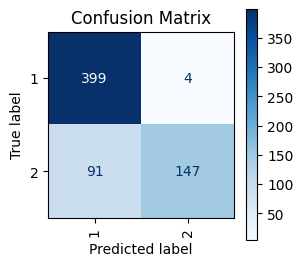

,Metric,Score
0,Brier Score,0.136633
1,AUROC,0.983245


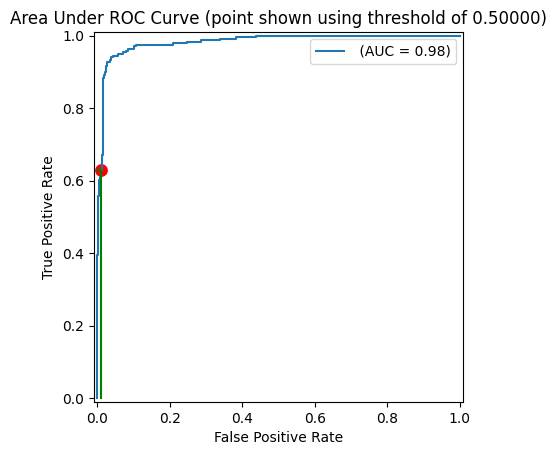

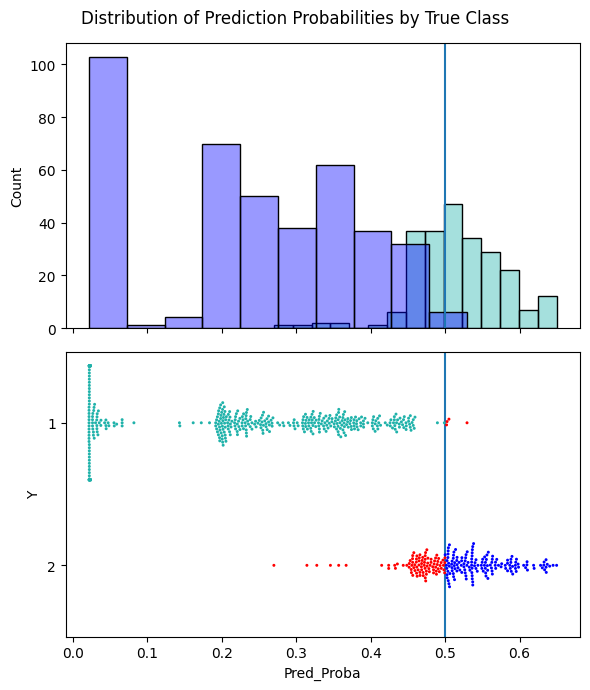

In [16]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
) 

,Start Range %,End Range %,Min Probability,Max Probability,Count 1,Count 2,Total Count,Precision,Recall,Cumulative Count 2,Cumulative Total Count,Cumulative Precision,Cumulative Recall
0,0.9,1.0,0.552825,0.645044,0,64,64,1.000000,0.268908,64,64,1.000000,0.268908
1,0.8,0.9,0.509194,0.551226,1,63,64,0.984375,0.264706,127,128,0.992188,0.533613
2,0.7,0.8,0.473152,0.508731,5,59,64,0.921875,0.247899,186,192,0.968750,0.781513
3,0.6,0.7,0.434981,0.473030,24,40,64,0.625000,0.168067,226,256,0.882812,0.949580
4,0.5,0.6,0.364732,0.434753,58,6,64,0.093750,0.025210,232,320,0.725000,0.974790
5,0.4,0.5,0.319510,0.364285,61,3,64,0.046875,0.012605,235,384,0.611979,0.987395
6,0.3,0.4,0.234321,0.317514,62,2,64,0.031250,0.008403,237,448,0.529018,0.995798
7,0.2,0.3,0.199175,0.233330,64,0,64,0.000000,0.000000,237,512,0.462891,0.995798
8,0.1,0.2,0.026403,0.198962,61,0,61,0.000000,0.000000,237,573,0.413613,0.995798
9,0.0,0.1,0.021737,0.023730,67,0,67,0.000000,0.000000,237,640,0.370312,0.995798


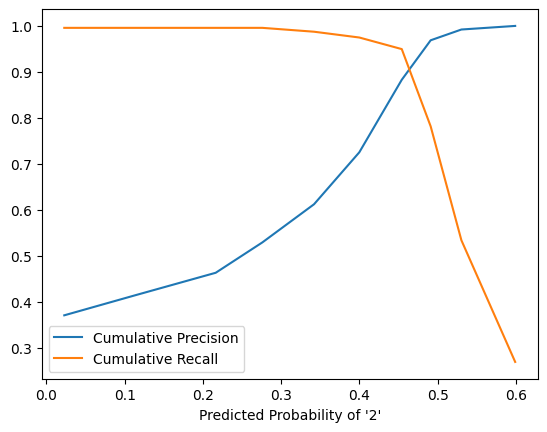

In [17]:
tuner.print_stats_table(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba
)

100%|██████████| 9/9 [00:10<00:00,  1.15s/it]


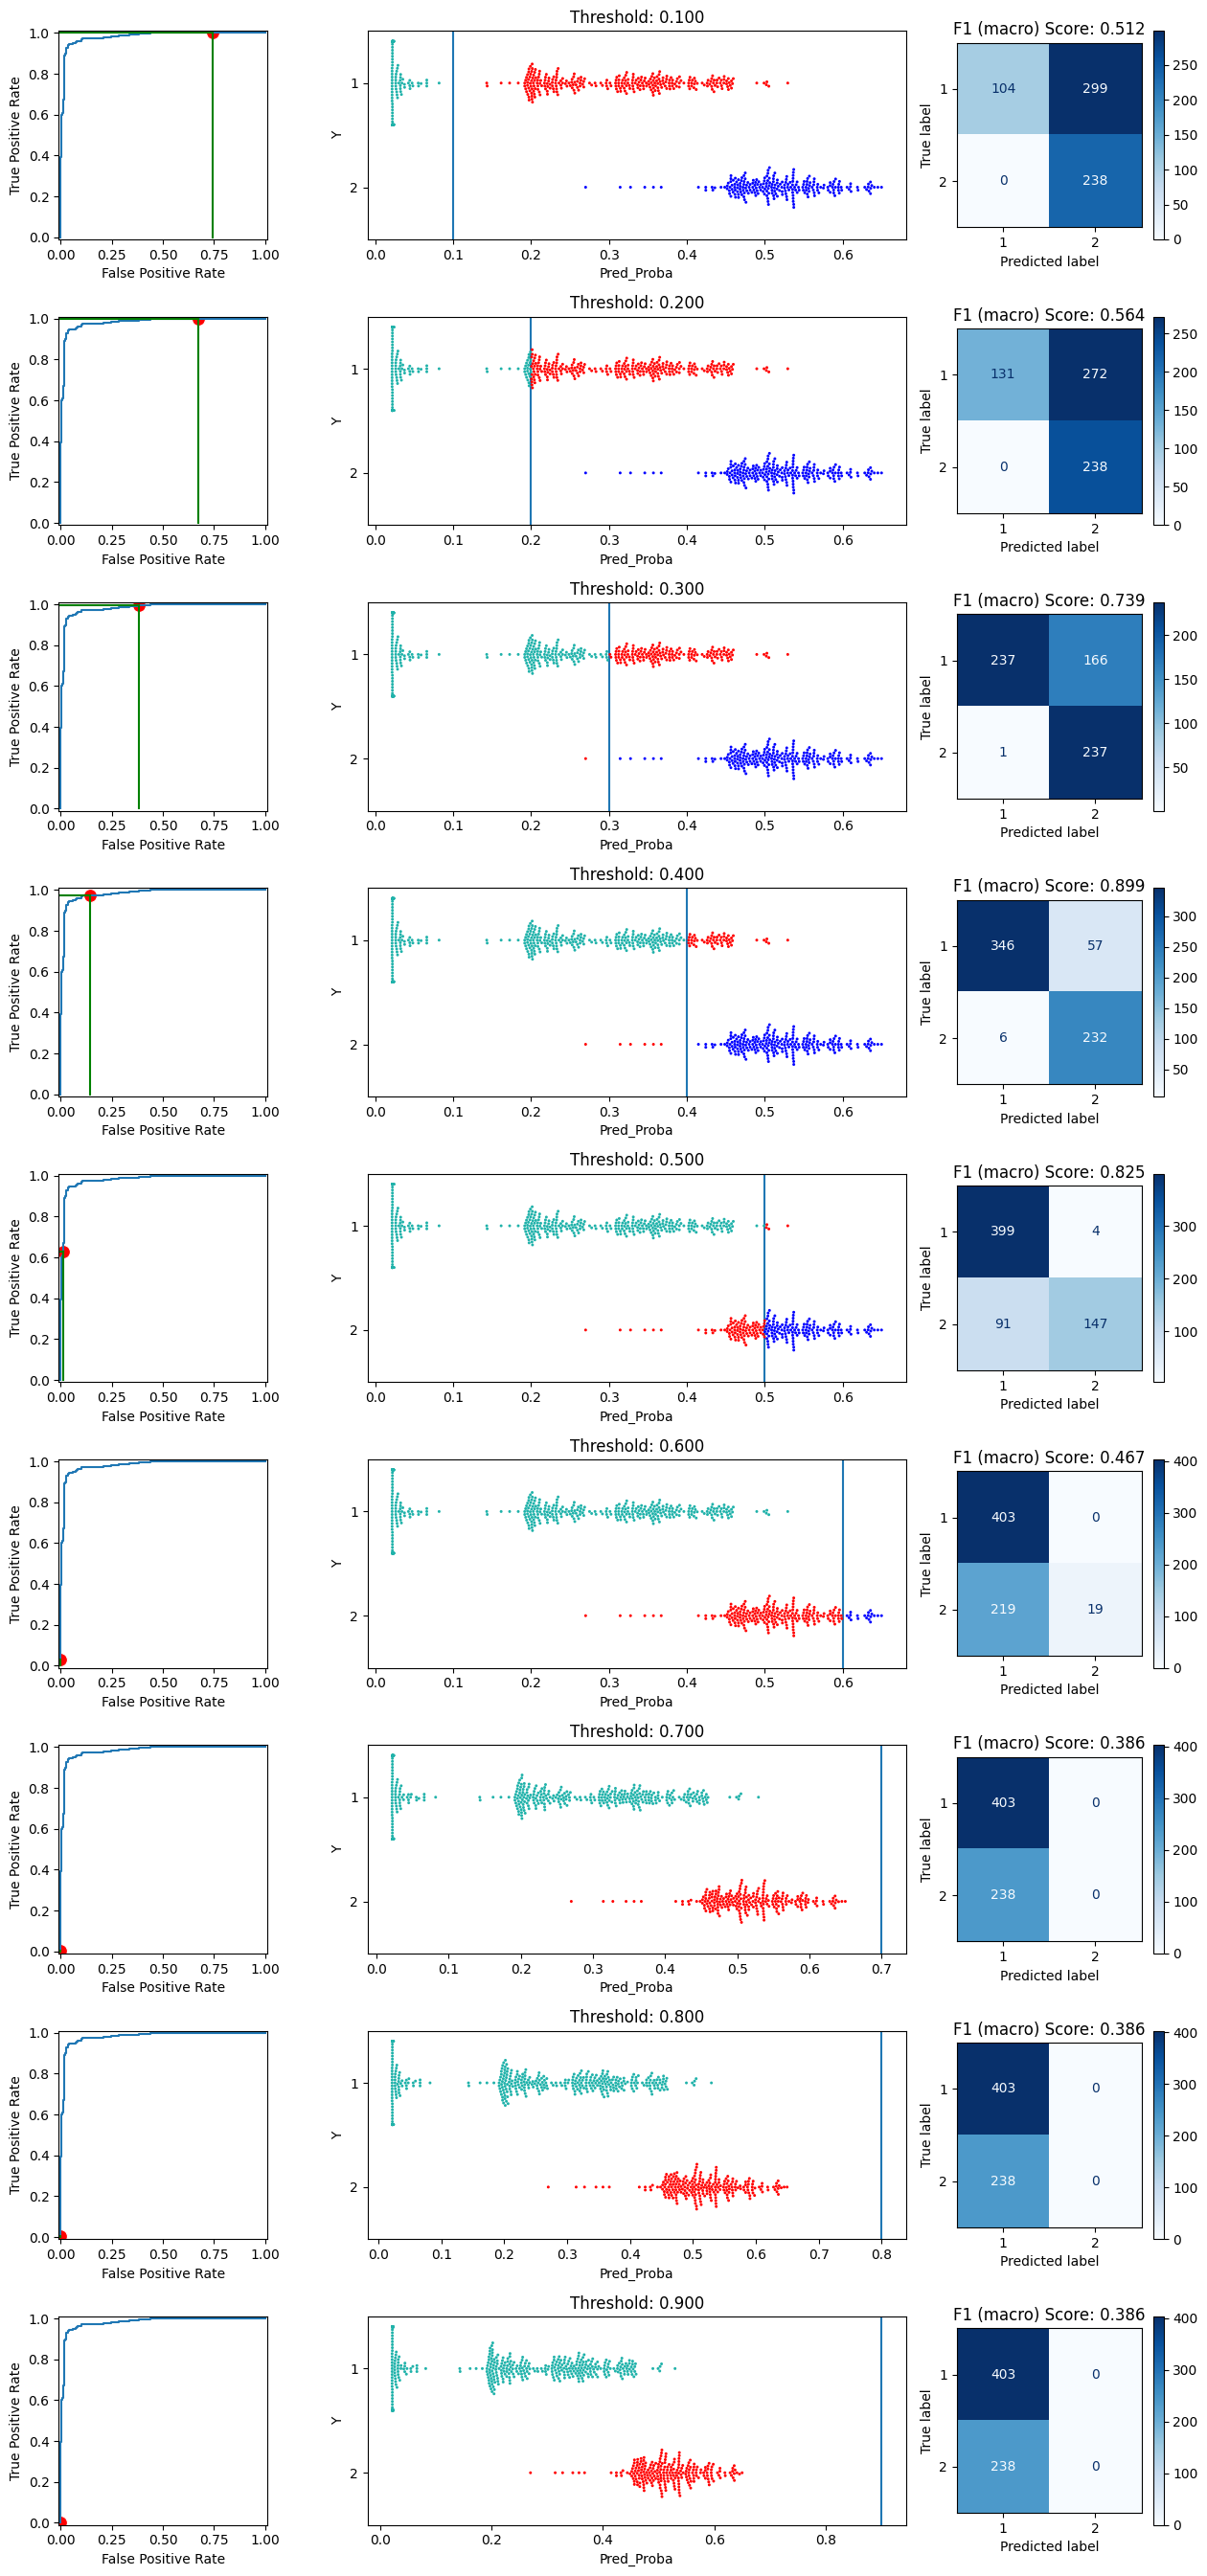

In [18]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:728: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,
d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:745: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,


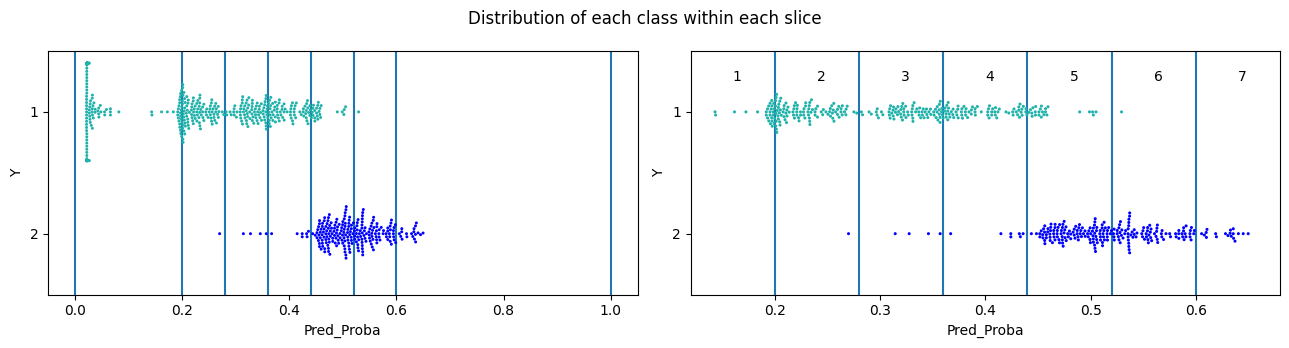

,Slice,Min Prob,Max Prob,2,1,Total,Fraction 2,Fraction 1
0,1,0.00,0.20,0,131,131,0.000000,1.000000
1,2,0.20,0.28,1,98,99,0.010101,0.989899
2,3,0.28,0.36,4,79,83,0.048193,0.951807
3,4,0.36,0.44,7,70,77,0.090909,0.909091
4,5,0.44,0.52,118,24,142,0.830986,0.169014
5,6,0.52,0.60,89,1,90,0.988889,0.011111
6,7,0.60,1.00,19,0,19,1.000000,0.000000


In [19]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.2, end=0.6, num_slices=5)

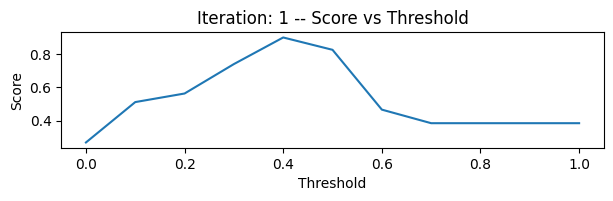

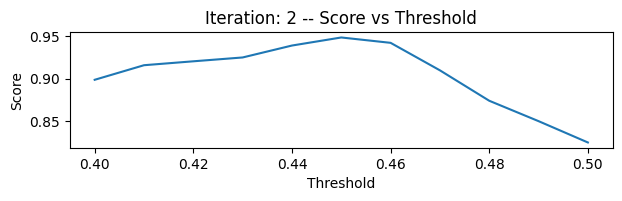

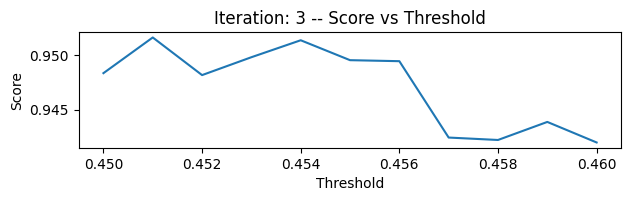

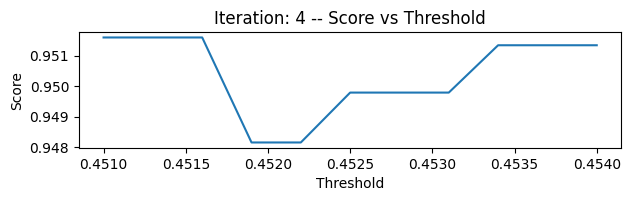

0.45145000000000013

In [20]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)
best_threshold

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,1,2,Macro
0,Precision,0.965174,0.937238,0.951206
0,Recall,0.962779,0.941176,0.951978
0,F1,0.963975,0.939203,0.951589


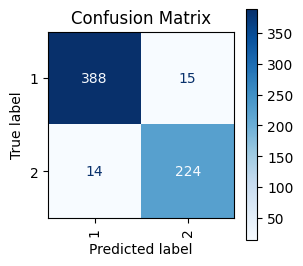

,Metric,Score
0,Brier Score,0.136633
1,AUROC,0.983245


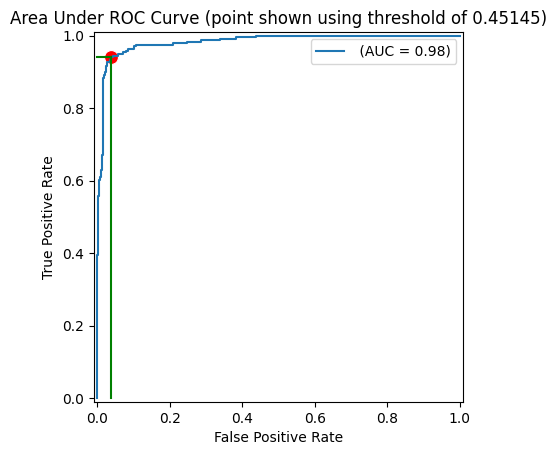

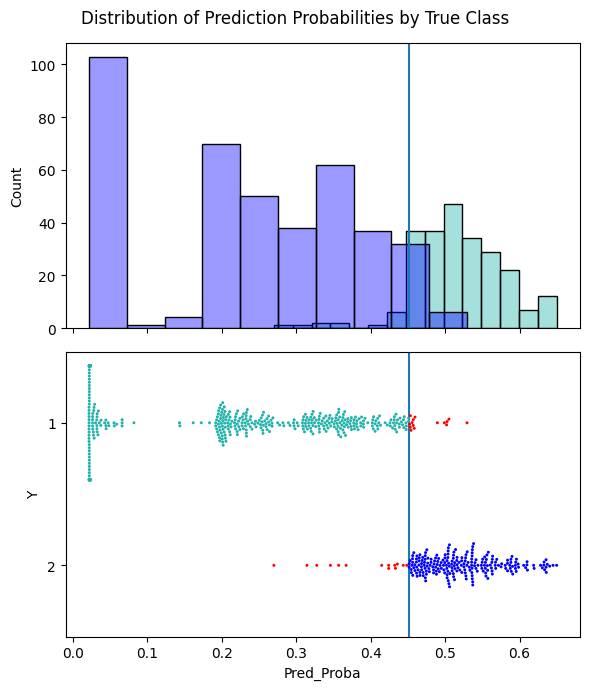

In [21]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    thresholds=best_threshold
) 

In [22]:
np.random.seed(0)

data = fetch_openml("phoneme", version=1, parser='auto') 
df = pd.DataFrame(data['data'])
df

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127
...,...,...,...,...,...
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085


In [23]:
y_true = data['target']
y_true.value_counts()

Class
1    3818
2    1586
Name: count, dtype: int64

In [24]:
target_classes = ['1', '2']

In [25]:

X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

tuner = ClassificationThresholdTuner()

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,1,2,Macro
0,Precision,0.852021,0.663848,0.757935
0,Recall,0.875392,0.618110,0.746751
0,F1,0.863549,0.640163,0.751856


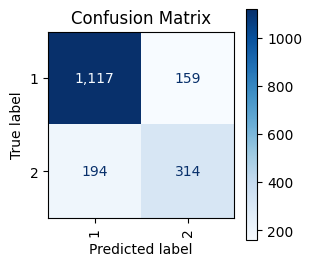

,Metric,Score
0,Brier Score,0.130500
1,AUROC,0.877751


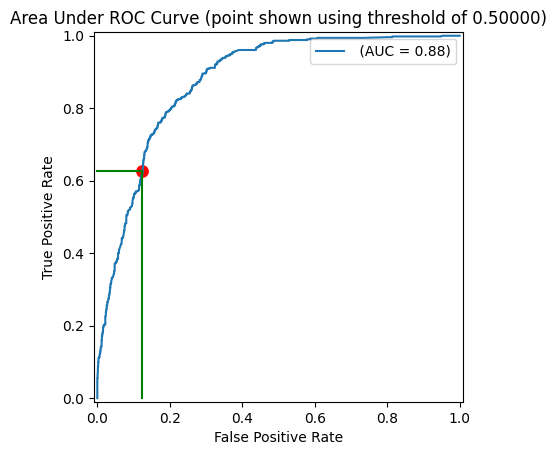

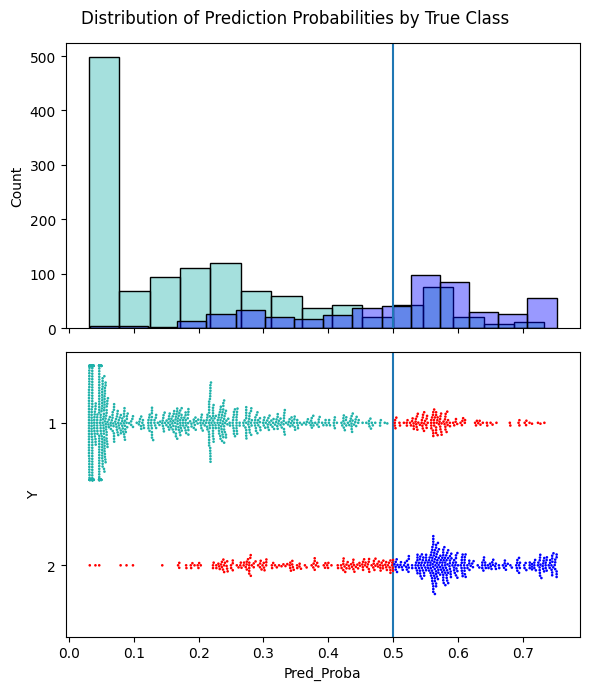

In [26]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

,Start Range %,End Range %,Min Probability,Max Probability,Count 1,Count 2,Total Count,Precision,Recall,Cumulative Count 2,Cumulative Total Count,Cumulative Precision,Cumulative Recall
0,0.9,1.0,0.596275,0.752012,40,139,179,0.776536,0.273622,139,179,0.776536,0.273622
1,0.8,0.9,0.553971,0.595844,62,116,178,0.651685,0.228346,255,357,0.714286,0.501969
2,0.7,0.8,0.452833,0.553257,76,103,179,0.575419,0.202756,358,536,0.667910,0.704724
3,0.6,0.7,0.328304,0.452641,116,62,178,0.348315,0.122047,420,714,0.588235,0.826772
4,0.5,0.6,0.244073,0.327868,129,50,179,0.279330,0.098425,470,893,0.526316,0.925197
5,0.4,0.5,0.187904,0.243947,152,26,178,0.146067,0.051181,496,1071,0.463119,0.976378
6,0.3,0.4,0.089885,0.187153,171,7,178,0.039326,0.013780,503,1249,0.402722,0.990157
7,0.2,0.3,0.049770,0.089345,178,2,180,0.011111,0.003937,505,1429,0.353394,0.994094
8,0.1,0.2,0.036132,0.049715,149,2,151,0.013245,0.003937,507,1580,0.320886,0.998031
9,0.0,0.1,0.031040,0.036039,203,1,204,0.004902,0.001969,508,1784,0.284753,1.000000


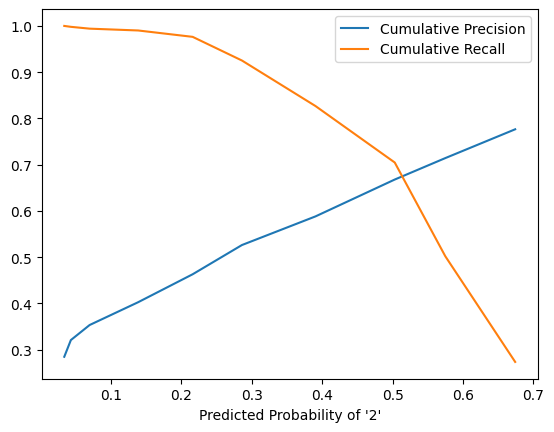

In [27]:
tuner.print_stats_table(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba
)

100%|██████████| 9/9 [00:33<00:00,  3.76s/it]


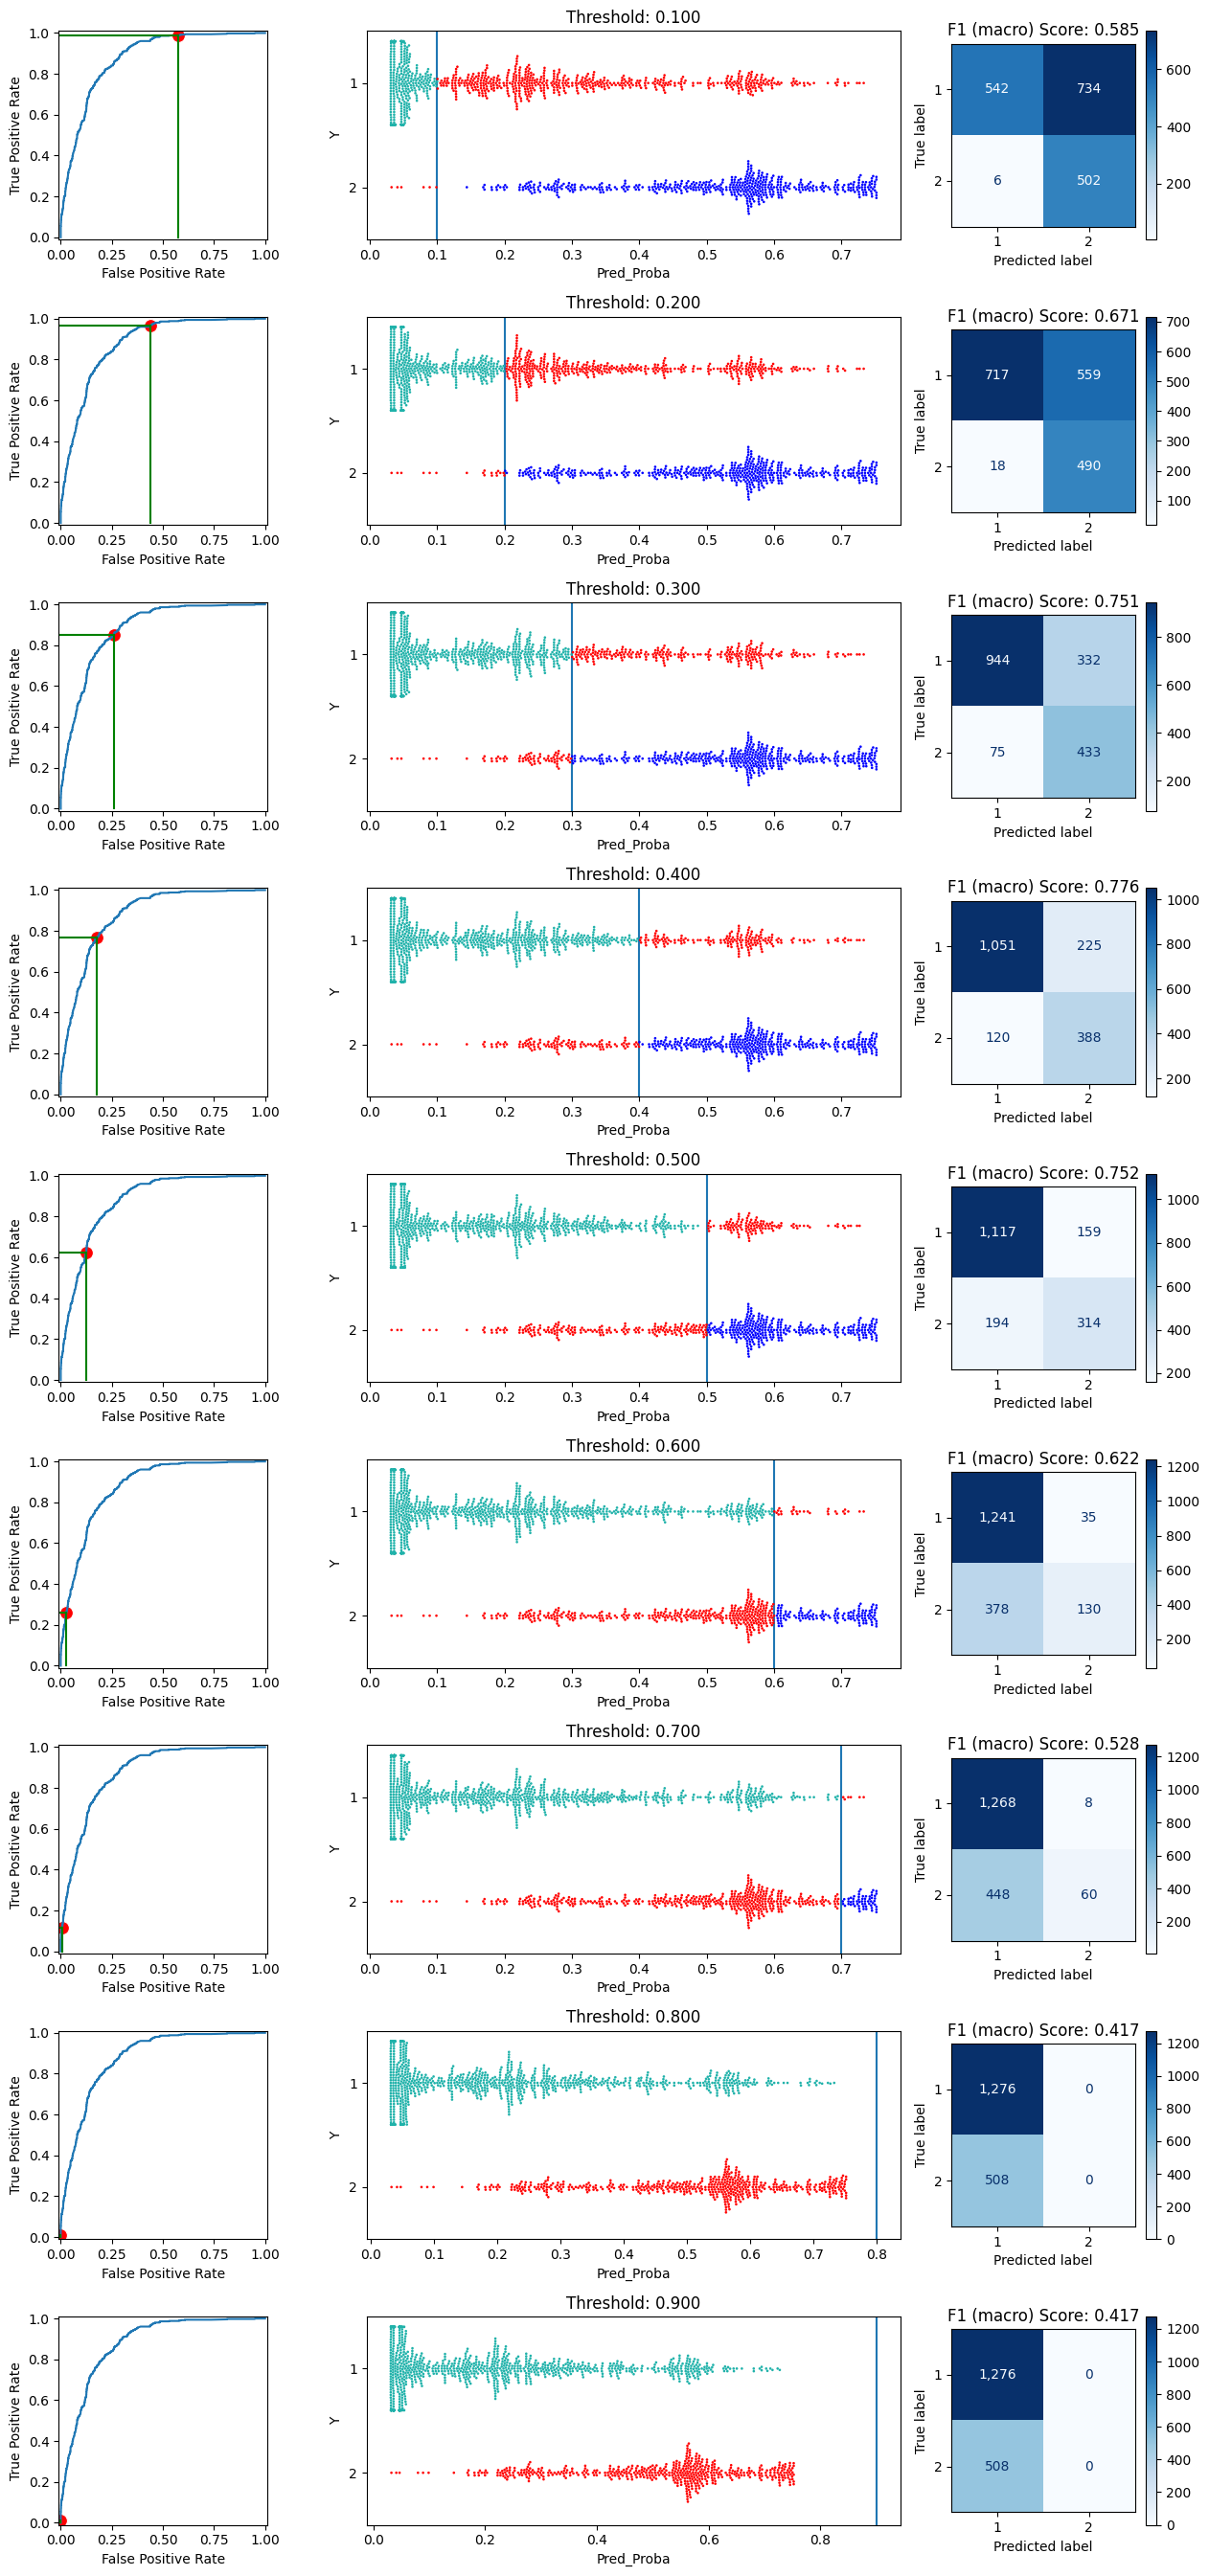

In [28]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:728: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,
d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:745: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,


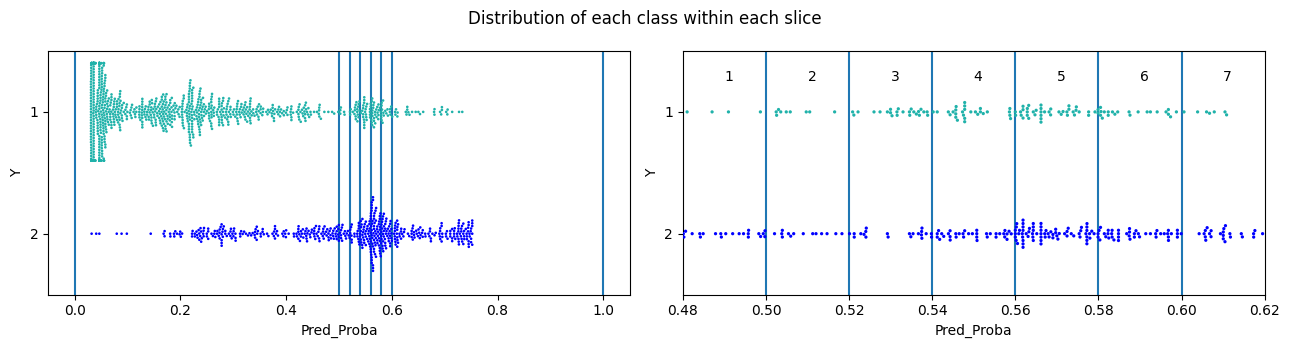

,Slice,Min Prob,Max Prob,1,2,Total,Fraction 1,Fraction 2
0,1,0.00,0.50,1117,194,1311,0.852021,0.147979
1,2,0.50,0.52,9,14,23,0.391304,0.608696
2,3,0.52,0.54,24,21,45,0.533333,0.466667
3,4,0.54,0.56,29,38,67,0.432836,0.567164
4,5,0.56,0.58,41,69,110,0.372727,0.627273
5,6,0.58,0.60,21,42,63,0.333333,0.666667
6,7,0.60,1.00,35,130,165,0.212121,0.787879


In [29]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.5, end=0.6, num_slices=5)

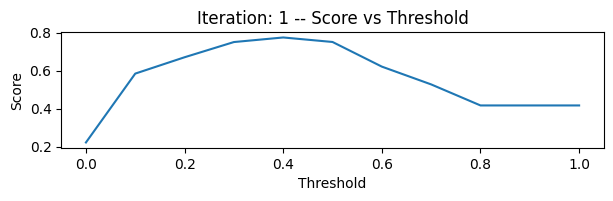

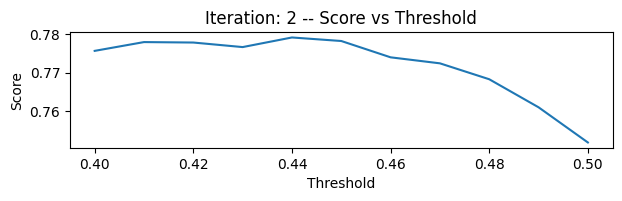

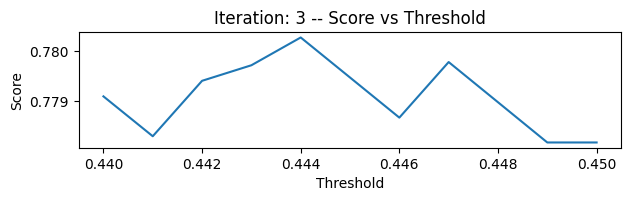

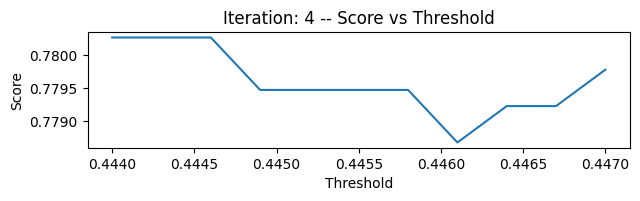

0.4444500000000001

In [30]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)
best_threshold

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,1,2,Macro
0,Precision,0.883065,0.667279,0.775172
0,Recall,0.858150,0.714567,0.786359
0,F1,0.870429,0.690114,0.780272


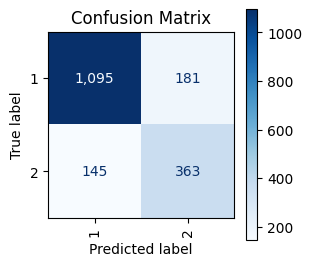

,Metric,Score
0,Brier Score,0.130500
1,AUROC,0.877751


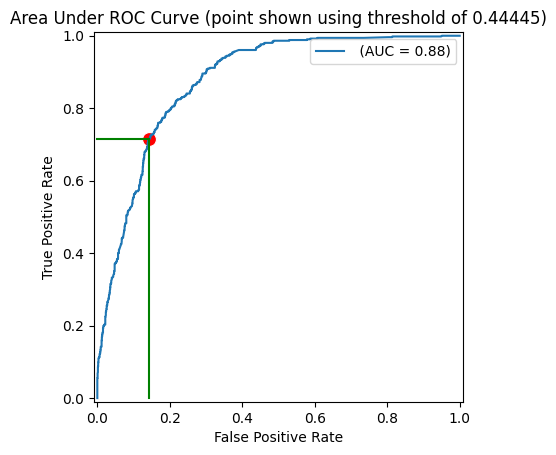

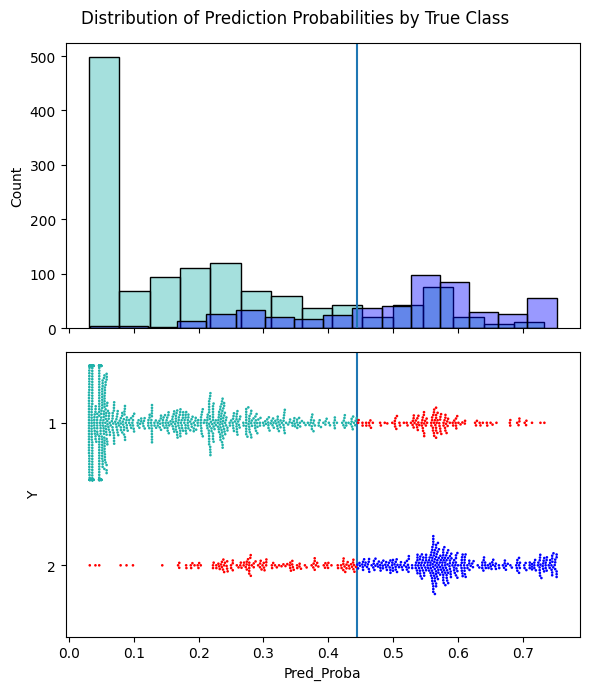

In [31]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)

In [32]:
from sklearn.datasets import load_digits

np.random.seed(0)

data = load_digits()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [33]:
target_classes = data.target_names
target_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,0,1,2,3,4,5,6,7,8,9,Macro
0,Precision,0.625000,0.542857,0.612903,0.481481,0.706667,1.000000,0.643678,0.802817,0.944444,0.846154,0.720600
0,Recall,1.000000,0.345455,0.730769,0.928571,0.828125,0.506849,0.982456,0.919355,0.326923,0.161765,0.673027
0,F1,0.769231,0.422222,0.666667,0.634146,0.762590,0.672727,0.777778,0.857143,0.485714,0.271605,0.631982


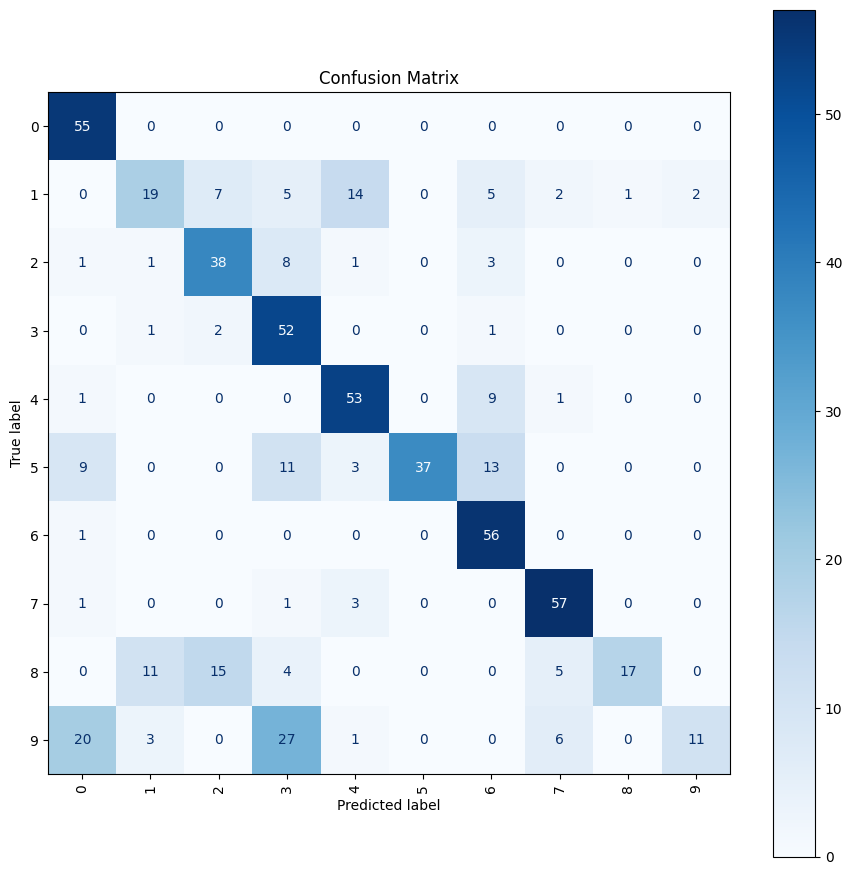

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:425: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,
d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:425: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=d_sample, orient='h', x="Pred_Proba", y="Y", s=swarm_dot_size, order=target_classes,
d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:425: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplo

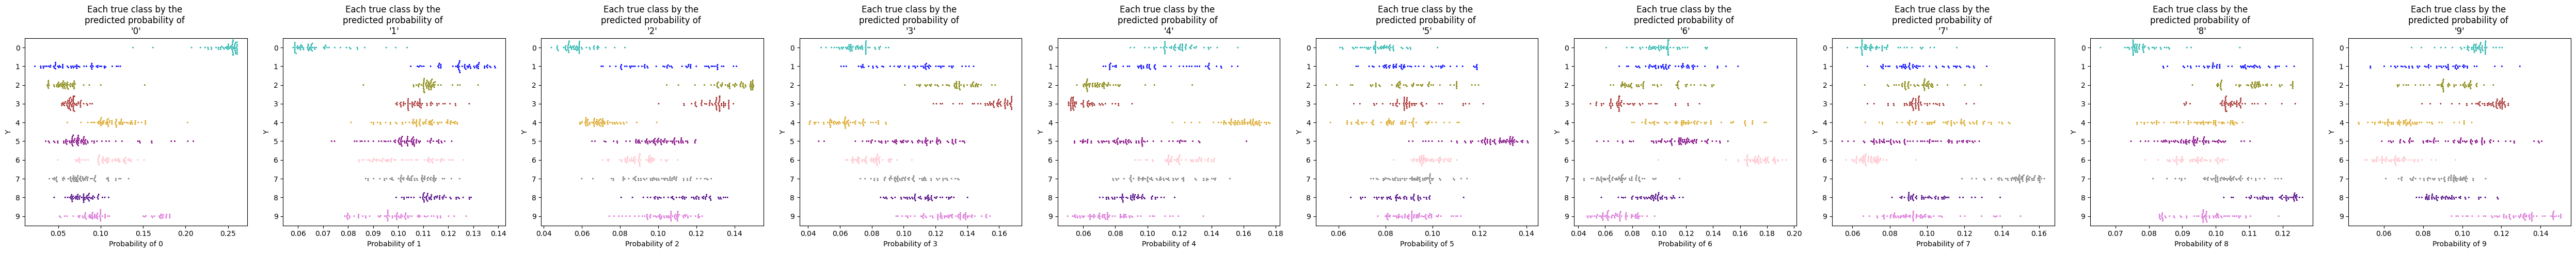

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.25540972 0.25579878 0.26074531 0.24135676 0.26074531 0.22637752
 0.24999153 0.25750004 0.20719367 0.25970476 0.16168794 0.22307599
 0.25056654 0.24699344 0.25609346 0.24264286 0.23596724 0.25608834
 0.23033093 0.13813571 0.23869944 0.24877961 0.25481829 0.25768334
 0.25540972 0.22676596 0.26074531 0.25829306 0.25900743 0.23066811
 0.25832529 0.23865812 0.25412252 0.25897167 0.24855205 0.26074531
 0.2175878  0.26074531 0.24540373 0.2411708  0.25582388 0.25032516
 0.26074531 0.25906058 0.26074531 0.25563631 0.25522375 0.25608834
 0.25048829 0.25830897 0.24423931 0.25642874 0.25195255 0.25263707
 0.25403708]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  d.loc[d_class.index, "Probability of True Class"] = y_pred_proba[d_class.index, target_cla

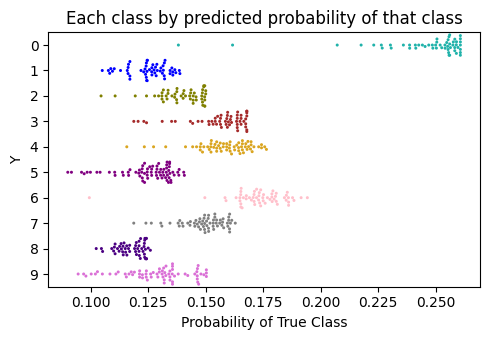

In [35]:
tuner = ClassificationThresholdTuner()
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)   

In [36]:
from sklearn.metrics import f1_score

best_thresholds = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    metric=f1_score,
    average='macro',
    default_class='0',
    max_iterations=5
)
best_thresholds

 20%|██        | 1/5 [00:03<00:14,  3.69s/it]


[0.0, 0.02, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [37]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class='0',
    thresholds=best_thresholds
) 

d:\xuexi\使用 ClassificationThresholdTuner 获得更好的分类结果\threshold_tuner.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  display_df = pd.concat([display_df, pd.DataFrame([['Precision'] + prec_arr.tolist()], columns=display_df.columns)])


,Metric,0,1,2,3,4,5,6,7,8,9,Macro
0,Precision,0.625000,0.542857,0.612903,0.481481,0.706667,1.000000,0.643678,0.802817,0.944444,0.846154,0.720600
0,Recall,1.000000,0.345455,0.730769,0.928571,0.828125,0.506849,0.982456,0.919355,0.326923,0.161765,0.673027
0,F1,0.769231,0.422222,0.666667,0.634146,0.762590,0.672727,0.777778,0.857143,0.485714,0.271605,0.631982


KeyboardInterrupt: 